In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

<class 'numpy.ndarray'> [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

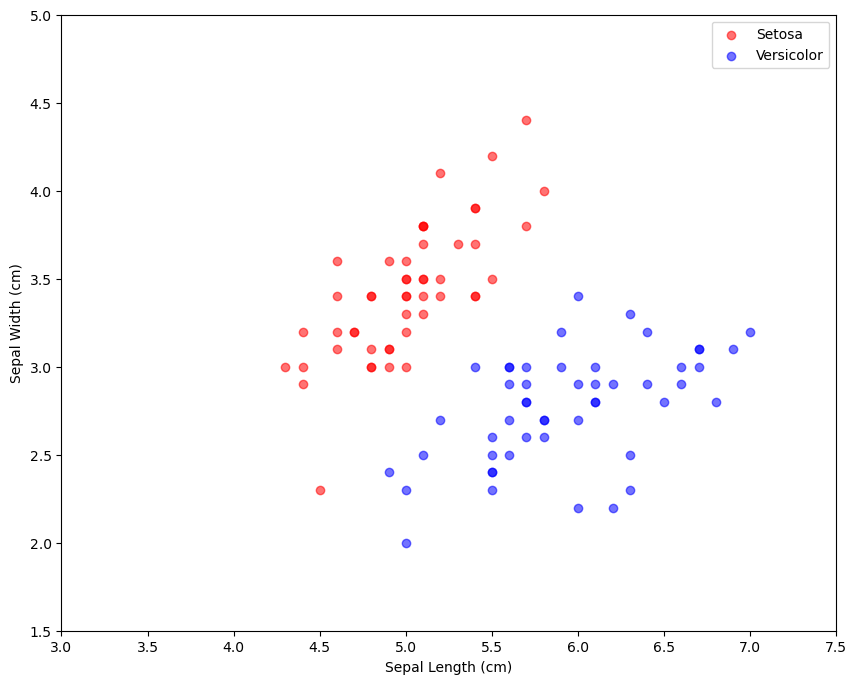

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target #获取目标标签，即每个样本对应的类别（0,1,2分别代表三种鸢尾花）
print(type(X),X)
print(type(y),y)
#这里我们写二维的SVM，所以接下来只选取两组数据
X = X[y<2,:2] #选择目标标签小于2的样本，也就是只取类别0和1（因为原始数据有三类，这里我们只取两类）
y = y[y<2] 
print(type(X),X)
print(type(y),y)

plt.figure(figsize=(10, 8))
plt.scatter(X[y==0,0], X[y==0,1], color='red', alpha=0.55, label='Setosa')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', alpha=0.55, label='Versicolor')
plt.xlim(3.0, 7.5)
plt.ylim(1.5, 5.0)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [7]:
#创建一个StandardScaler对象，用于数据的标准化处理。
#标准化是指将数据变换为均值为0，标准差为1的分布。
#SVM基于距离计算（如间隔最大化），不同特征的量纲差异会导致模型偏向数值较大的特征。标准化保证所有特征处于相同量级。
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X) 
#决策边界为直线，C=1E10：设置极大的惩罚参数（10^10），强制要求严格分类（硬间隔），不允许分类错误
model = SVC(kernel='linear', C=1E10)
model.fit(X_standard, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
#模型评估
y_pred = model.predict(X_standard)
print(type(y_pred),y_pred)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

<class 'numpy.ndarray'> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 1.00


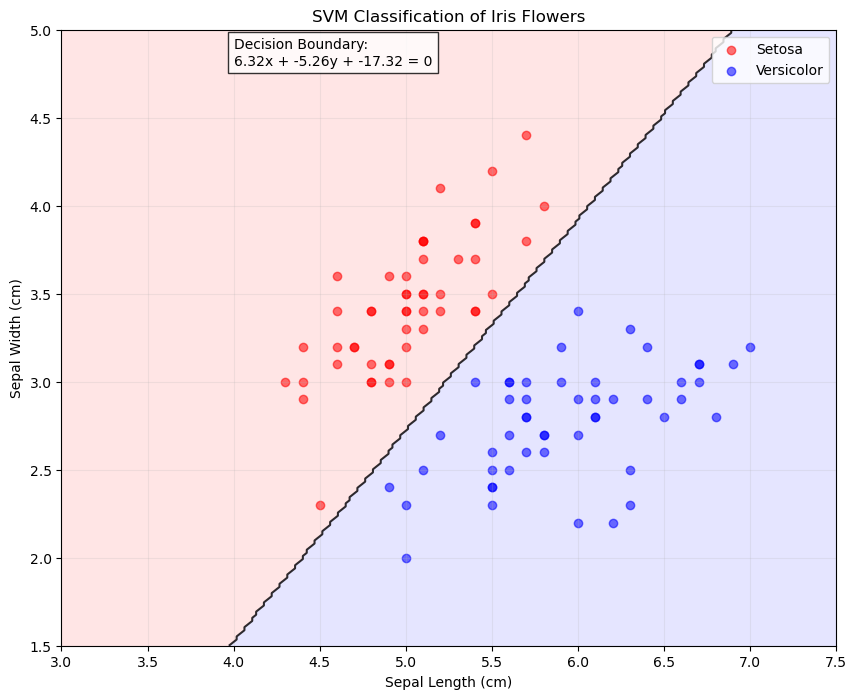

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y==0,0], X[y==0,1], color='red', alpha=0.55, label='Setosa')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', alpha=0.55, label='Versicolor')

# 1. 绘制决策边界（在原始数据空间）
# 创建网格点
xx, yy = np.meshgrid(np.linspace(3.0, 7.5, 200),
                     np.linspace(1.5, 5.0, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# 标准化网格点（使用相同的scaler）
grid_standard = standardScaler.transform(grid)

# 预测网格点类别
Z = model.predict(grid_standard)
Z = Z.reshape(xx.shape)

# 绘制决策边界和间隔区域
plt.contourf(xx, yy, Z, alpha=0.1, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.contour(xx, yy, Z, colors='black', linewidths=1.5, alpha=0.8, levels=[0])

# 3. 添加超平面方程信息
# 获取模型参数（在标准化空间）
w = model.coef_[0]
b = model.intercept_[0]

# 在原始空间表示的超平面方程（需要转换）
mean = standardScaler.mean_
std = standardScaler.scale_

# 转换权重到原始空间
w_original = w / std
b_original = b - np.dot(w / std, mean)

# 显示超平面方程
equation = f"{w_original[0]:.2f}x + {w_original[1]:.2f}y + {b_original:.2f} = 0"
plt.text(4.0, 4.8, f"Decision Boundary:\n{equation}", 
         bbox=dict(facecolor='white', alpha=0.8))

# 设置图形属性
plt.xlim(3.0, 7.5)
plt.ylim(1.5, 5.0)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Classification of Iris Flowers')
plt.legend()
plt.grid(alpha=0.2)
plt.show()